# Tutorial 1: Text Parsing and Exploring Text Corpora

In this notebook, we will cover:
 - Tokenization
 - Parts of Speech (PoS) tagging
 - Parsing Techniques such as:
  - Shallow Parsing
  - Consituency Trees
 - Basics of WordNet
 - Application of these concepts on a given dataset/corpus 

 This notebook will use popular NLP packages such as:
  - ``nltk``
  - ``spacy``

We will also use popular data processing and handling packages such as ``numpy`` and ``pandas``

Let's get started!

__Note:__ We recommend running these notebooks in Google Colab so you don't have to install dependencies manually in your environment or face challenges with a few dependencies on windows environments.

# Import Libraries and Setup Packages

In [ ]:
dir()

In [1]:
import nltk
import spacy
import numpy as np
import pandas as pd

In [2]:
# download spacy models for English language
nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)
# 'en_core_web_sm'

In [3]:
# download PoS tagger for NLTK
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/fritz/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Sample Sentence
We will use a sample English sentence to understand most concepts in this notebook.


In [4]:
sentence = "The brown fox is quick and he is jumping over the lazy dog"
sentence

'The brown fox is quick and he is jumping over the lazy dog'

# Tokenization
 - Each sentence is a collection of different words and punctuation marks.
 - The process of obtaining words from sentences is called __tokenization__
 - The most naive and simple way of tokenization is to split by space. We can do so easily using standard python string utility ``split``

In [5]:
# split/tokenize sentence into words
words = sentence.split()

# print the list of words tokenized from the input sentence
print(words)

['The', 'brown', 'fox', 'is', 'quick', 'and', 'he', 'is', 'jumping', 'over', 'the', 'lazy', 'dog']


## Parts of Speech (PoS) Tags
Parts of Speech tagging is the process of identifying each word in a text as corresponding to a particular part of speech (_noun, verb, adjective, etc._), based on both its definition and its context

- POS tagging is not a trivial task
- One needs to understand the syntax and symantics of a language to identify POS tags
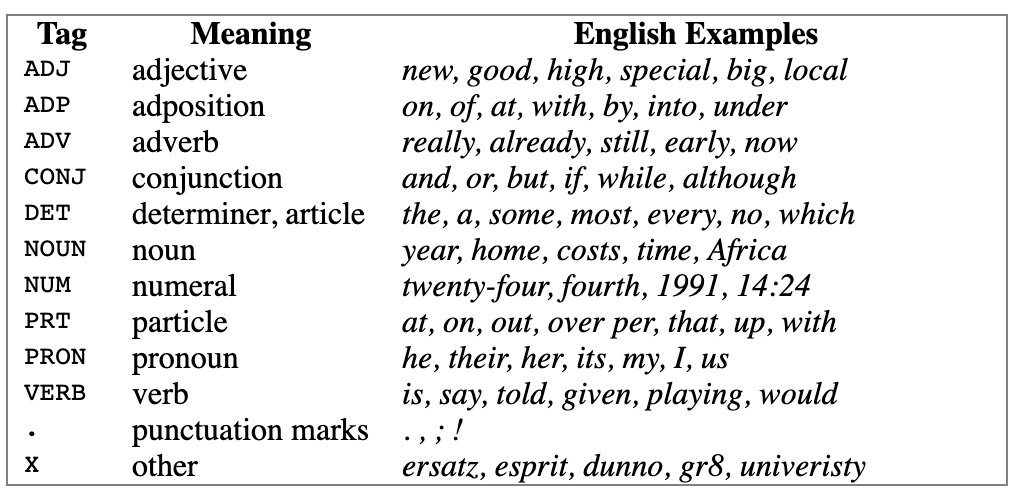
Source: http://www.nltk.org/book/ch05.html

Here, we will use the POS tagger from ``nltk`` to the job for us. This POS tagger takes a list of words tokenized from the input sentence as input.

In [6]:
# apply POS tagger
pos_tags = nltk.pos_tag(sentence.split())

In [7]:
pos_tags


[('The', 'DT'),
 ('brown', 'JJ'),
 ('fox', 'NN'),
 ('is', 'VBZ'),
 ('quick', 'JJ'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('is', 'VBZ'),
 ('jumping', 'VBG'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dog', 'NN')]

In [8]:
import random
s1 = sentence.split()
s1

['The',
 'brown',
 'fox',
 'is',
 'quick',
 'and',
 'he',
 'is',
 'jumping',
 'over',
 'the',
 'lazy',
 'dog']

In [9]:
s2 = random.shuffle(s1)

In [10]:
s1

['lazy',
 'is',
 'dog',
 'fox',
 'brown',
 'is',
 'the',
 'The',
 'over',
 'jumping',
 'he',
 'and',
 'quick']

In [11]:
pos_tags_shuffled = random.shuffle(pos_tags)
print(pos_tags)

[('dog', 'NN'), ('The', 'DT'), ('brown', 'JJ'), ('lazy', 'JJ'), ('fox', 'NN'), ('quick', 'JJ'), ('over', 'IN'), ('the', 'DT'), ('and', 'CC'), ('he', 'PRP'), ('is', 'VBZ'), ('is', 'VBZ'), ('jumping', 'VBG')]


In [12]:
# transform output into a pandas dataframe for ease of understanding
pd.DataFrame(pos_tags).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,dog,The,brown,lazy,fox,quick,over,the,and,he,is,is,jumping
1,NN,DT,JJ,JJ,NN,JJ,IN,DT,CC,PRP,VBZ,VBZ,VBG


## Spacy for POS Tagging

``spacy`` also provides POS tagging capabilities out of the box.

- Step 1: Parse the sentence using the ``spacy``'s ``nlp`` object we created while importing spacy models
- Step 2: Loop through each of the words which has a tag and corresponding location information attached

In [13]:
# get POS tags using spacy
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in nlp(sentence)]

# Format the output using pandas dataframe
pd.DataFrame(spacy_pos_tagged).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN
2,DET,ADJ,NOUN,AUX,ADJ,CCONJ,PRON,AUX,VERB,ADP,DET,ADJ,NOUN


# Shallow Parsing

We extracted POS tags in the previous step. Shallow parsing is the next logical step which helps us in understanding the relationship betweek the POS tags.

More formaly, shallow parsing is a method to analyse a sentence to identify parts of speech and then link them to higher order units that have discrete grammatical meanings.





In the hierarchy tree, groups of words make up phrases which form the third level in the syntax tree. By principle, phrases are assumed to have at least two or more words considering the pecking order of words ⟵phrases ⟵clauses ⟵symbols. 

There are five major categories of phrases which are described below.

- Noun Phrase (NP): These are phrases where a noun acts as the head word.

- Verb Phrase (VP): These phrases are lexical units which have a verb acting as the head word. 

- Adjective Phrase (ADJP): These are phrases whose head word is an adjective. Their main role is to describe or qualify nouns and pronouns in a sentence and they will be either placed before or after the noun or pronoun. 

- Adverb Phrase (ADVP): These phrases act like an adverb since the adverb acts as the head word in the phrase. Adverb phrases are used as modifiers for nouns, verbs or adverbs themselves by providing further details to describe or qualify them. 
 
- Prepositional Phrase (PP): These phrases usually contain a preposition as the head word and other lexical components like nouns, pronouns etc. It acts like an adjective or adverb describing other words or phrases. 


These five major syntactic categories of phrases can be generated from words using several rules some of which we discussed above like utilizing syntax and grammars of different types.


In the following cell, we will :
- Create a very general grammar rule consisting of Nouns, Adjectives, Prepositions and so on.
- Use this rule to create a regex based sentence parser
- We will then use the POS tags of our input sentence to build a shallow parse tree of the input


We will be using ``nltk`` utilities for this exercise

In [14]:
grammar = '''
            NP: {<DT>?<JJ>?<NN.*>}  
            ADJP: {<JJ>}
            ADVP: {<RB.*>}
            PP: {<IN>}      
            VP: {<MD>?<VB.*>+}
          '''

pos_tagged_sent = nltk.pos_tag(sentence.split())
rp = nltk.RegexpParser(grammar)
shallow_parsed_sent = rp.parse(pos_tagged_sent)
print(shallow_parsed_sent)

(S
  (NP The/DT brown/JJ fox/NN)
  (VP is/VBZ)
  (ADJP quick/JJ)
  and/CC
  he/PRP
  (VP is/VBZ jumping/VBG)
  (PP over/IN)
  (NP the/DT lazy/JJ dog/NN))


#### Visualize Parse Tree

The output from previous cell can be better understood using a visualization called as Parse Tree.

For folks using Colab to run this notebook, we would need to install a separate package called ``svgling`` to visualize the tree. For others, its optional

In [15]:
# this is used for handling tkinter issue on colab/jupyter
# svgling monkey-patches nltk tree draw
!pip install svgling

In [16]:
import svgling

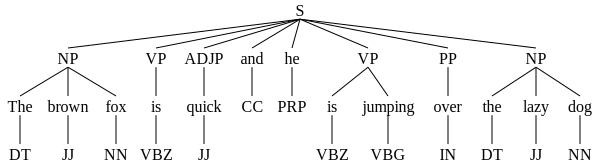

In [17]:
# visualize shallow parse tree
svgling.draw_tree(shallow_parsed_sent)

# Constituency Parsing
Constituency parsing is the method which helps us understand a sentence as a combination of smaller phrases. A constituency parse tree breaks a text into smaller sub-phrases. Intermediate nodes in the tree are the phrases while the terminal nodes are the words in the sentence. Typically edges are left unlabeled in a constituency tree.

Phrase structure rules form the core of constituency grammars since they talk about syntax and rules which govern the hierarchy and ordering of the various constituents in the sentences. These rules cater to two things primarily. The generic representation of a phrase structure rule is S →A B which depicts that the structure S consists of constituents A and B and the ordering is A followed by B.

There are several phrase structure rules and we will explore them one by one to understand how exactly do we extract and order constituents in a sentence. The most important rule describes how to divide a sentence or a clause. The phrase structure rule denotes a binary division for a sentence or a clause as S → NP VP where S is the sentence or clause and it is divided into the subject, denoted by the Noun Phrase (NP) and the predicate, denoted by the Verb Phrase (VP). 



To build a constituency tree, we need to download the ``stanford parser`` and use it with the help of interfaces provided by the ``nltk`` library

In [ ]:
# download the stanford parser jar file
!wget https://nlp.stanford.edu/software/stanford-parser-full-2015-04-20.zip

In [ ]:
# unzip the downloaded file to get the required parser jar files
!unzip stanford-parser-full-2015-04-20.zip

In [18]:
from nltk.parse.stanford import StanfordParser

# Create a stanford parser object by setting location for parser and model jar files
scp = StanfordParser(path_to_jar='./stanford-parser-full-2015-04-20/stanford-parser.jar',
                   path_to_models_jar='./stanford-parser-full-2015-04-20/stanford-parser-3.5.2-models.jar')

/Users/fritz/Python_Projects/Natural_Language_Processing/NLP_Statistics_Class_Jan2021/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  """


In [19]:
# get the parse tree
result = list(scp.raw_parse(sentence))
print(result[0])

(ROOT
  (NP
    (S
      (S
        (NP (DT The) (JJ brown) (NN fox))
        (VP (VBZ is) (ADJP (JJ quick))))
      (CC and)
      (S
        (NP (PRP he))
        (VP
          (VBZ is)
          (VP
            (VBG jumping)
            (PP (IN over) (NP (DT the) (JJ lazy) (NN dog)))))))))


### Visualize Tree

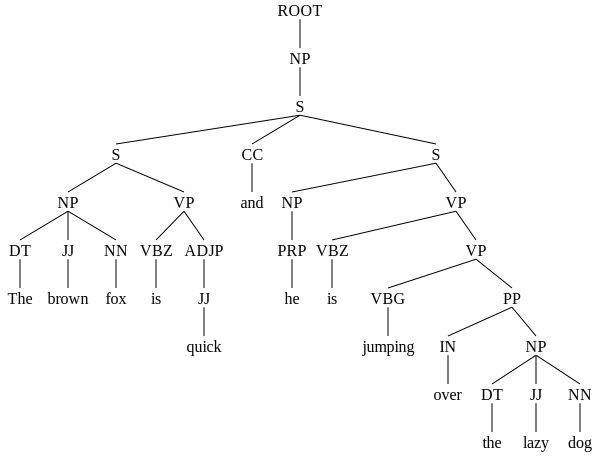

In [20]:
# visualize constituency tree
svgling.draw_tree(result[0])

From the above figure, you can conclude that our sentence has two main clauses or constituents which we had talked about earlier and they are joined together by a co-ordinating conjunction (and). 

# Dependency Parsing

Dependency grammars always have a one-to-one relationship correspondence for each word in the sentence. There are two aspects to this grammar representation. One is the syntax or structure of the sentence and the other is the semantics obtained from the relationships denoted between the words. 

Each directed edge represents a specific type of meaningful relationship (also known as syntactic function) and we can annotate our sentence further showing the specific dependency relationship types between the words.

Instead of creating a tree with linear orders, you can also represent it with a normal graph since there is no concept of order of words in dependency grammar. We can leverage spacy to build us this dependency tree\graph for our sample sentence.

``spacy`` provides an elegant and easy to use interface to generate similar output. It also provides a cleaner visualization using the ``displacy`` utility

In [21]:
from spacy import displacy

displacy.render(nlp(sentence), jupyter=True, 
                options={'distance': 100,
                         'arrow_stroke': 1.5,
                         'arrow_width': 8})

# Corpus Analysis

We have covered a number of concepts so far. Let us now apply that understanding on a given corpus.

Text corpora is the plural form of 'text corpus' and can be defined as large and structured collection of texts or textual data. It usually consists of a body of written or spoken text, often stored in electronic form. This includes converting old historic text corpora from physical to electronic form so that it can be analyzed and processed with ease. The primary purpose of text corpora is to leverage them for linguistic as well as statistical analysis and to use them as data for building natural language processing tools. 

__Brown Corpus:__ This was the first million-word corpus for the English language, published by Kucera and Francis in 1961, also known as "A Standard Corpus of Present-Day American English". This corpus consists of text from a wide variety of sources and categories.

We will leverage the _brown_ corpus from ``nltk`` as our starting point

We have already talked a bit about the Brown Corpus which was developed in 1961 at the Brown University. This corpus consists of texts from 500 sources and has been grouped into various categories. The following code snippet loads the Brown Corpus into the system memory and shows the various available categories.

In [22]:
# download the corpus
nltk.download('brown')

[nltk_data] Downloading package brown to /Users/fritz/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [23]:
# load the Brown Corpus
from nltk.corpus import brown

# get total number of categories
print('Total Categories:', len(brown.categories()))

Total Categories: 15


### Tokenize Sentences

In [24]:
# tokenized sentences
# this is already done/pre-processed by nltk
brown.sents(categories='mystery')

[['There', 'were', 'thirty-eight', 'patients', 'on', 'the', 'bus', 'the', 'morning', 'I', 'left', 'for', 'Hanover', ',', 'most', 'of', 'them', 'disturbed', 'and', 'hallucinating', '.'], ['An', 'interne', ',', 'a', 'nurse', 'and', 'two', 'attendants', 'were', 'in', 'charge', 'of', 'us', '.'], ...]

### POS Tagging

In [25]:
# this is already done/pre-processed by nltk
brown.tagged_sents(categories='mystery')

[[('There', 'EX'), ('were', 'BED'), ('thirty-eight', 'CD'), ('patients', 'NNS'), ('on', 'IN'), ('the', 'AT'), ('bus', 'NN'), ('the', 'AT'), ('morning', 'NN'), ('I', 'PPSS'), ('left', 'VBD'), ('for', 'IN'), ('Hanover', 'NP'), (',', ','), ('most', 'AP'), ('of', 'IN'), ('them', 'PPO'), ('disturbed', 'VBN'), ('and', 'CC'), ('hallucinating', 'VBG'), ('.', '.')], [('An', 'AT'), ('interne', 'NN'), (',', ','), ('a', 'AT'), ('nurse', 'NN'), ('and', 'CC'), ('two', 'CD'), ('attendants', 'NNS'), ('were', 'BED'), ('in', 'IN'), ('charge', 'NN'), ('of', 'IN'), ('us', 'PPO'), ('.', '.')], ...]

## Create Sentences

Since the brown corpus already contains tokenized sentences, let us try and create their original structure and print the same

In [26]:
# get sentences in natural form
sentences = brown.sents(categories='mystery')
sentences = [' '.join(sentence_token) for sentence_token in sentences]
sentences[0:5] # viewing the first 5 sentences

['There were thirty-eight patients on the bus the morning I left for Hanover , most of them disturbed and hallucinating .',
 'An interne , a nurse and two attendants were in charge of us .',
 "I felt lonely and depressed as I stared out the bus window at Chicago's grim , dirty West Side .",
 'It seemed incredible , as I listened to the monotonous drone of voices and smelled the fetid odors coming from the patients , that technically I was a ward of the state of Illinois , going to a hospital for the mentally ill .',
 'I suddenly thought of Mary Jane Brennan , the way her pretty eyes could flash with anger , her quiet competence , the gentleness and sweetness that lay just beneath the surface of her defenses .']

### Get List of Nouns
To get a list of nouns from the preprocessed corpus, all we need to do is look for POS tags which signify Nouns 

(_hint: NP and NN_)

In [27]:
# get tagged words
tagged_words = brown.tagged_words(categories='mystery')

# get nouns from tagged words
nouns = [(word, tag) for word, tag in tagged_words if any(noun_tag in tag for noun_tag in ['NP', 'NN'])]

nouns[0:10] # view the first 10 nouns

[('patients', 'NNS'),
 ('bus', 'NN'),
 ('morning', 'NN'),
 ('Hanover', 'NP'),
 ('interne', 'NN'),
 ('nurse', 'NN'),
 ('attendants', 'NNS'),
 ('charge', 'NN'),
 ('bus', 'NN'),
 ('window', 'NN')]

## Analyze Nouns

- There are quite a lot of nouns in this dataset
- Let us understand which are the most frequently occuring ones

In [28]:
# build frequency distribution for nouns
nouns_freq = nltk.FreqDist([word for word, tag in nouns])

# view top 10 occuring nouns
nouns_freq.most_common(10)

[('man', 106),
 ('time', 82),
 ('door', 80),
 ('car', 69),
 ('room', 65),
 ('Mr.', 63),
 ('way', 61),
 ('office', 50),
 ('eyes', 48),
 ('hand', 46)]

## Additional Corpora to Analyze

In [29]:
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package reuters to /Users/fritz/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /Users/fritz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
# load the Reuters Corpus
from nltk.corpus import reuters

# total categories
print('Total Categories:', len(reuters.categories()))

Total Categories: 90


In [31]:
# get sentences in housing and income categories
sentences = reuters.sents(categories=['housing', 'income'])
sentences = [' '.join(sentence_tokens) for sentence_tokens in sentences]
sentences[0:5]  # view the first 5 sentences

["YUGOSLAV ECONOMY WORSENED IN 1986 , BANK DATA SHOWS National Bank economic data for 1986 shows that Yugoslavia ' s trade deficit grew , the inflation rate rose , wages were sharply higher , the money supply expanded and the value of the dinar fell .",
 'The trade deficit for 1986 was 2 . 012 billion dlrs , 25 . 7 pct higher than in 1985 .',
 'The trend continued in the first three months of this year as exports dropped by 17 . 8 pct , in hard currency terms , to 2 . 124 billion dlrs .',
 'Yugoslavia this year started quoting trade figures in dinars based on current exchange rates , instead of dollars based on a fixed exchange rate of 264 . 53 dinars per dollar .',
 "Yugoslavia ' s balance of payments surplus with the convertible currency area fell to 245 mln dlrs in 1986 from 344 mln in 1985 ."]

In [32]:
# file-id based access
print(reuters.fileids(categories=['housing', 'income']))

['test/16118', 'test/18534', 'test/18540', 'test/18664', 'test/18665', 'test/18672', 'test/18911', 'test/19875', 'test/20106', 'test/20116', 'training/1035', 'training/1036', 'training/10602', 'training/10604', 'training/11170', 'training/11665', 'training/2618', 'training/29', 'training/3105', 'training/3708', 'training/3720', 'training/3723', 'training/3898', 'training/5883', 'training/5886', 'training/6000', 'training/6067', 'training/6197', 'training/7005', 'training/7006', 'training/7015', 'training/7036', 'training/7098', 'training/7099', 'training/9615']


In [33]:
print(reuters.sents(fileids=[u'test/16118', u'test/18534']))

[['YUGOSLAV', 'ECONOMY', 'WORSENED', 'IN', '1986', ',', 'BANK', 'DATA', 'SHOWS', 'National', 'Bank', 'economic', 'data', 'for', '1986', 'shows', 'that', 'Yugoslavia', "'", 's', 'trade', 'deficit', 'grew', ',', 'the', 'inflation', 'rate', 'rose', ',', 'wages', 'were', 'sharply', 'higher', ',', 'the', 'money', 'supply', 'expanded', 'and', 'the', 'value', 'of', 'the', 'dinar', 'fell', '.'], ['The', 'trade', 'deficit', 'for', '1986', 'was', '2', '.', '012', 'billion', 'dlrs', ',', '25', '.', '7', 'pct', 'higher', 'than', 'in', '1985', '.'], ...]


# WordNet

WordNet is a lexical database of semantic relations between words in more than 200 languages. WordNet links words into semantic relations including synonyms, hyponyms, and meronyms. The synonyms are grouped into synsets with short definitions and usage examples

WordNet database is also available through ``nltk`` library. It provides a straightforward and easy to use interface to utilize various features of the wordnet database.

In [ ]:
# download wordnet
nltk.download('wordnet')

In [34]:
# load the Wordnet Corpus
from nltk.corpus import wordnet as wn

### Get Synset for a sample word

**Synsets**: group of synonyms are termed as synsets.

In [35]:
word = 'hike' # taking hike as our word of interest
# get word synsets
word_synsets = wn.synsets(word)
word_synsets

[Synset('hike.n.01'),
 Synset('rise.n.09'),
 Synset('raise.n.01'),
 Synset('hike.v.01'),
 Synset('hike.v.02')]

## Synset Details

Wordnet also contains definitions, most used POS tag and a few examples to showcase usage of a given word's synonyms.

In [36]:
# get details for each synonym in synset
for synset in word_synsets:
    print(('Synset Name: {name}\n'
           'POS Tag: {tag}\n'
           'Definition: {defn}\n'
           'Examples: {ex}\n').format(name=synset.name(),
                                      tag=synset.pos(),
                                      defn=synset.definition(),
                                      ex=synset.examples()))
          

Synset Name: hike.n.01
POS Tag: n
Definition: a long walk usually for exercise or pleasure
Examples: ['she enjoys a hike in her spare time']

Synset Name: rise.n.09
POS Tag: n
Definition: an increase in cost
Examples: ['they asked for a 10% rise in rates']

Synset Name: raise.n.01
POS Tag: n
Definition: the amount a salary is increased
Examples: ['he got a 3% raise', 'he got a wage hike']

Synset Name: hike.v.01
POS Tag: v
Definition: increase
Examples: ['The landlord hiked up the rents']

Synset Name: hike.v.02
POS Tag: v
Definition: walk a long way, as for pleasure or physical exercise
Examples: ['We were hiking in Colorado', 'hike the Rockies']

